In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('FR00019.csv')
data.head(5)

,date,01,02,03,12,24,39
0,2021-06-14T15:30:00+00:00,16.0,13.1,54.4,74.5,30.2,18.3
1,2021-06-14T15:45:00+00:00,28.0,16.4,66.5,91.6,30.2,18.3
2,2021-06-14T16:00:00+00:00,13.0,8.5,44.9,58.0,30.3,18.4
3,2021-06-14T16:15:00+00:00,15.2,11.5,48.0,65.6,35.6,21.2
4,2021-06-14T16:30:00+00:00,15.4,13.3,53.5,73.9,35.6,21.2


In [15]:
new_names ={
    '01':  'SO2' ,
    '02' : 'NO' ,
    '03' : 'NO2' ,
    '12':  'NOx' , 
    '24' : 'PM10' ,
    '39' :  'PM2.5',  
              }

data.rename(columns=new_names, inplace=True)
data

,date,SO2,NO,NO2,NOx,PM10,PM2.5
0,2021-06-14T15:30:00+00:00,16.0,13.1,54.4,74.5,30.2,18.3
1,2021-06-14T15:45:00+00:00,28.0,16.4,66.5,91.6,30.2,18.3
2,2021-06-14T16:00:00+00:00,13.0,8.5,44.9,58.0,30.3,18.4
3,2021-06-14T16:15:00+00:00,15.2,11.5,48.0,65.6,35.6,21.2
4,2021-06-14T16:30:00+00:00,15.4,13.3,53.5,73.9,35.6,21.2
...,...,...,...,...,...,...,...
58048,2023-02-28T23:00:00+00:00,0.4,2.4,8.7,12.3,12.9,16.7
58049,2023-02-28T23:15:00+00:00,0.1,2.0,8.3,11.4,15.8,32.8
58050,2023-02-28T23:30:00+00:00,0.0,1.7,7.6,10.1,15.8,32.8
58051,2023-02-28T23:45:00+00:00,0.0,2.0,7.8,10.9,15.8,32.8


In [16]:
data.isna().sum()

date        0
SO2      2859
NO        578
NO2       577
NOx       577
PM10     1616
PM2.5    1551
dtype: int64

In [17]:
data.describe()

,SO2,NO,NO2,NOx,PM10,PM2.5
count,55194.000000,57475.000000,57476.000000,57476.000000,56437.000000,56502.000000
mean,1.974528,7.196534,16.486887,27.512231,19.632002,10.875130
std,5.222116,15.816785,14.046159,34.525911,13.056780,5.670702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,0.700000,6.000000,7.600000,11.000000,6.900000
50%,1.000000,1.900000,11.900000,15.500000,16.900000,9.700000
75%,1.600000,5.700000,22.700000,32.400000,24.800000,13.500000
max,171.200000,252.000000,156.800000,448.500000,209.200000,50.900000


In [18]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [19]:
data['year'] = data['date'].dt.year
print(data[['date', 'year']].head())

                       date  year
0 2021-06-14 15:30:00+00:00  2021
1 2021-06-14 15:45:00+00:00  2021
2 2021-06-14 16:00:00+00:00  2021
3 2021-06-14 16:15:00+00:00  2021
4 2021-06-14 16:30:00+00:00  2021


In [26]:
data.year.unique()

array([2021, 2022, 2023], dtype=int64)

In [20]:
daily_means = data.groupby(data['date'].dt.date).mean()
print(daily_means)

                 SO2        NO        NO2        NOx       PM10      PM2.5  \
date                                                                         
2021-06-14  7.000000  4.451515  37.039394  43.872727  26.426923  15.573077   
2021-06-15  9.460215  9.763542  30.492708  45.463542  29.434375  13.966667   
2021-06-16  8.156989  7.505208  19.297917  30.796875  28.318750  13.560417   
2021-06-17  1.907527  2.009574   9.414894  12.490426  19.665625   9.610417   
2021-06-18  1.981720  2.393750  11.778125  15.451042  29.002083  12.726042   
...              ...       ...        ...        ...        ...        ...   
2023-02-25  0.748913  6.640426  19.511702  29.694681  26.012500  16.727083   
2023-02-26  0.361957  1.413542   7.742708   9.909375  13.606250   8.509375   
2023-02-27  0.185870  4.367708  15.023958  21.723958   8.001042   8.913542   
2023-02-28  0.105435  3.493750  15.121875  20.481250  14.360417  14.884375   
2023-03-01       NaN  2.200000   7.400000  10.900000  15.800000 

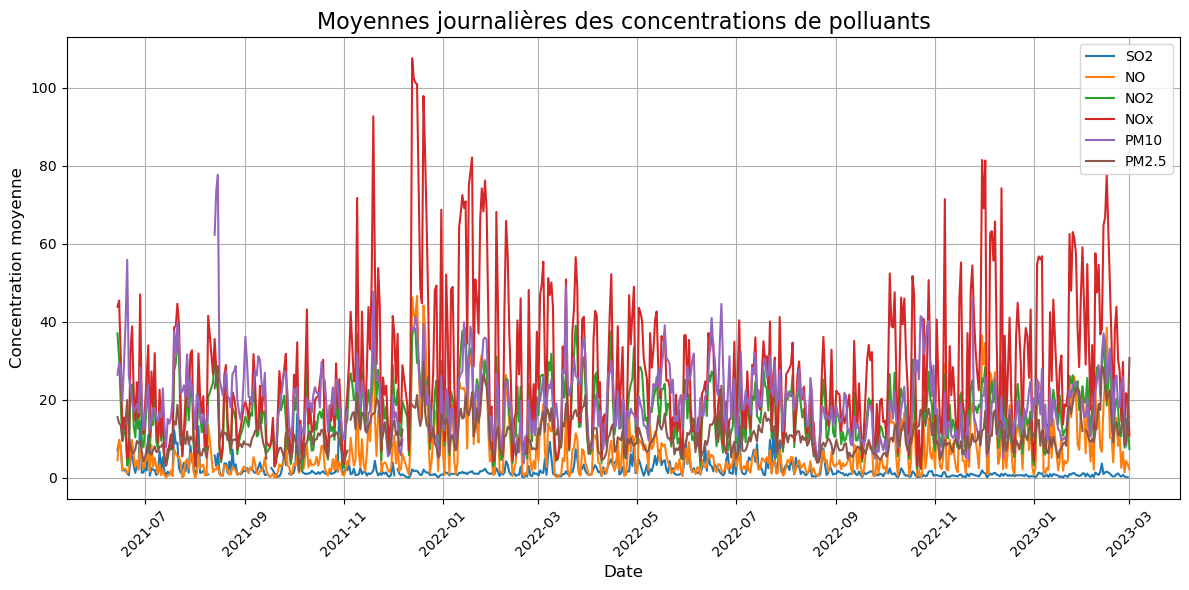

In [21]:
plt.figure(figsize=(12, 6))
for col in ['SO2', 'NO', 'NO2', 'NOx', 'PM10', 'PM2.5']:
    plt.plot(daily_means.index, daily_means[col], label=col)


plt.title('Moyennes journalières des concentrations de polluants', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Concentration moyenne', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [28]:
# Calcule des moyennes des polluants par année
yearly_means = data.groupby('year').mean()
print(yearly_means)


plt.figure(figsize=(12, 6))

# Tracer une courbe pour chaque polluant
#for col in ['SO2', 'NO', 'NO2', 'NOx', 'PM10', 'PM2.5']:
#    plt.plot(yearly_means.index, yearly_means[col], label=col)


#plt.title('Moyennes annuelles des concentrations de polluants à Bouc Bel Air', fontsize=16)
#plt.xlabel('Année', fontsize=12)
#plt.ylabel('Concentration moyenne', fontsize=12)
#plt.legend(loc='upper right')  
#plt.grid(True)
#plt.tight_layout()

# Afficher le graphique
#plt.show()

           SO2         NO        NO2        NOx       PM10      PM2.5
year                                                                 
2021  2.452754   6.026841  16.015594  25.238370  21.421993  10.669432
2022  1.917900   7.203491  16.464683  27.504023  18.798271  10.588439
2023  0.757655  11.188612  18.263812  35.419136  19.382563  13.553874


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

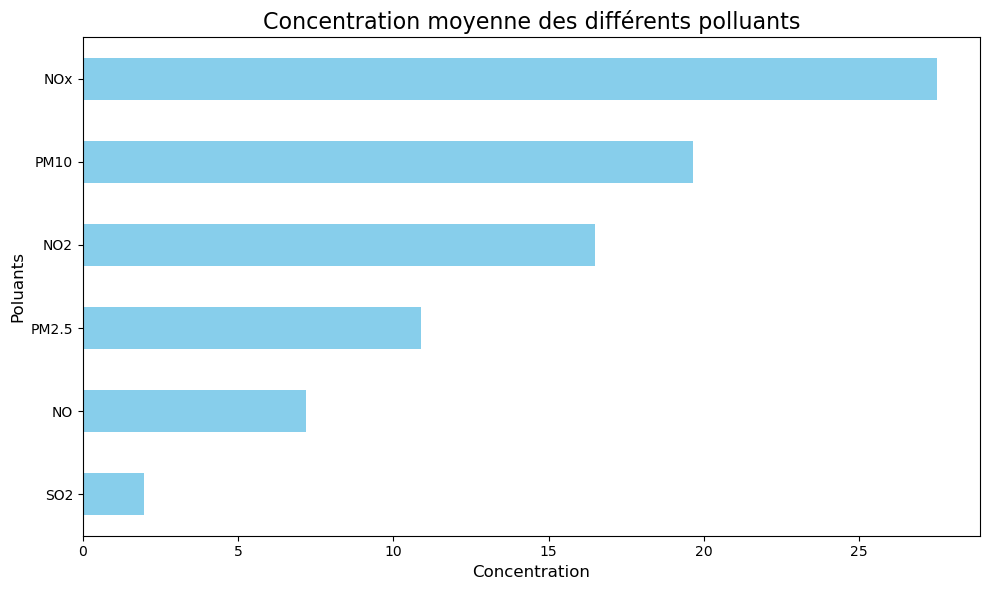

In [23]:
# Colonnes des polluants
pollutant_columns = ['SO2', 'NO', 'NO2', 'NOx', 'PM10', 'PM2.5']

# Calculer les moyennes des polluants
pollutant_means = data[pollutant_columns].mean()
pollutant_means_sorted = pollutant_means.sort_values(ascending=True)

# Créer un diagramme en barres pour visualiser les concentrations moyennes
plt.figure(figsize=(10, 6))
pollutant_means_sorted.plot(kind='barh', color='skyblue')

# Ajouter des labels et un titre
plt.title('Concentration moyenne des différents polluants', fontsize=16)
plt.xlabel('Concentration', fontsize=12)
plt.ylabel('Poluants', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()
